In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
TRIM='2'
filename = 'INDIVIDUAL_T'+TRIM+'_GBA.csv'
df=pd.read_csv(filename,dtype={'Nro_Vivienda':str})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130512 entries, 0 to 130511
Data columns (total 23 columns):
Unnamed: 0        130512 non-null int64
Nro_Vivienda      130512 non-null object
Nro_Hogar         130512 non-null int64
Componente        130512 non-null int64
Ano               130512 non-null int64
Trimestre         130512 non-null int64
Region            130512 non-null int64
Mas500            130512 non-null object
Aglomerado        130512 non-null int64
RelHogar          130512 non-null int64
Sexo              130512 non-null object
Edad              130512 non-null int64
NivelEd           130512 non-null int64
CondActividad     130512 non-null int64
CatOcupacion      130512 non-null int64
CatInactividad    130512 non-null int64
ServDomestico     117674 non-null float64
IngTI             130459 non-null float64
DIngTIG           130512 non-null int64
DIngTIL           130512 non-null int64
IngTF             130512 non-null int64
DIngTFG           130512 non-null int64
DI

In [20]:
df.Ano.value_counts()

2017    11254
2016    11206
2015    10937
2014    10713
2006     9746
2004     9631
2005     9227
2008     8820
2009     8666
2007     8498
2011     8250
2010     8098
2012     8008
2013     7458
Name: Ano, dtype: int64

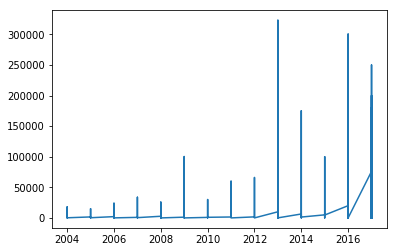

In [30]:
plt.plot(df.Ano,df.IngTI)

In [14]:
df=df[df['Ano']==2017]
df['IngTI'].fillna(value=-1, inplace=True)
#df[df.IngTI.lt(0)]=0
df=df[df.IngTI.ge(0)]
df.shape


(9766, 23)

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130512 entries, 0 to 130511
Data columns (total 23 columns):
Unnamed: 0        130512 non-null int64
Nro_Vivienda      130512 non-null object
Nro_Hogar         130512 non-null int64
Componente        130512 non-null int64
Ano               130512 non-null int64
Trimestre         130512 non-null int64
Region            130512 non-null int64
Mas500            130512 non-null object
Aglomerado        130512 non-null int64
RelHogar          130512 non-null int64
Sexo              130512 non-null object
Edad              130512 non-null int64
NivelEd           130512 non-null int64
CondActividad     130512 non-null int64
CatOcupacion      130512 non-null int64
CatInactividad    130512 non-null int64
ServDomestico     117674 non-null float64
IngTI             130459 non-null float64
DIngTIG           130512 non-null int64
DIngTIL           130512 non-null int64
IngTF             130512 non-null int64
DIngTFG           130512 non-null int64
DI

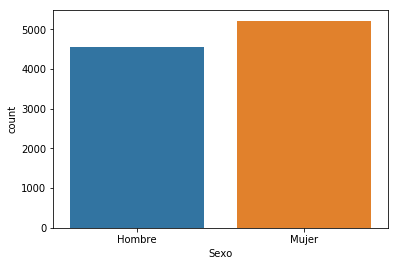

In [16]:
sns.countplot(x='Sexo', data=df,order=['Hombre','Mujer'])

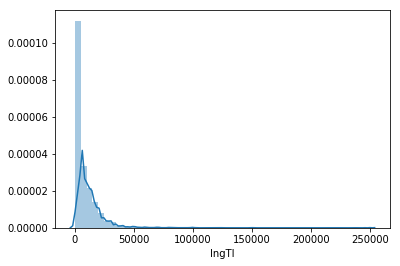

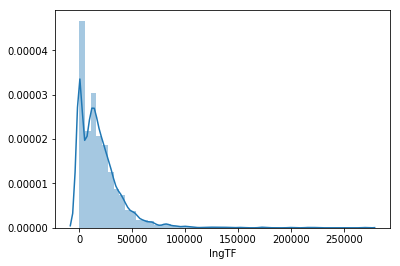

In [17]:
sns.distplot(df.IngTI)
plt.show()
sns.distplot(df.IngTF)

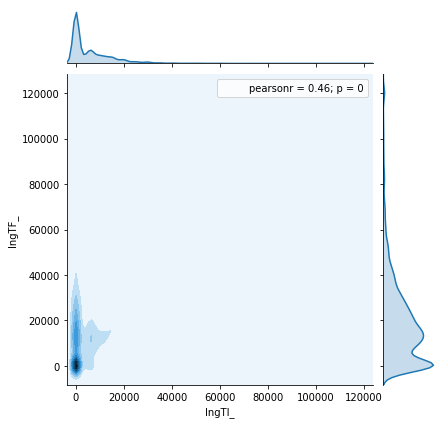

In [18]:
cota=120000
I=df['IngTI'].values.copy()
I[I>cota]=cota
df['IngTI_']=I

I=df['IngTF'].values.copy()
I[I>cota]=cota
df['IngTF_']=I

#sns.distplot(df.IngTI_)
#plt.show()
#sns.distplot(df.IngTF_)
#plt.show()
sns.jointplot(x="IngTI_", y="IngTF_", data=df, kind="kde");

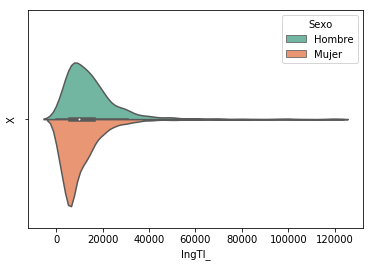

In [19]:
df["X"] = ""
sns.violinplot(y='X', x="IngTI_", hue="Sexo", palette="Set2", data=df[df['IngTI']>0], split=True, hue_order=['Hombre','Mujer']);

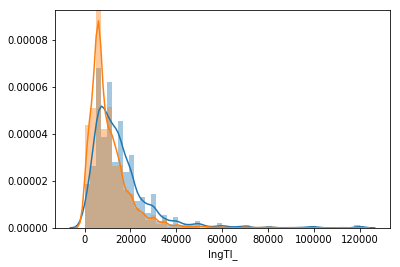

In [20]:
dg=df[df['IngTI']>0]
sns.distplot(dg['IngTI_'].loc[dg['Sexo']=='Hombre'])
sns.distplot(dg['IngTI_'].loc[dg['Sexo']=='Mujer'])

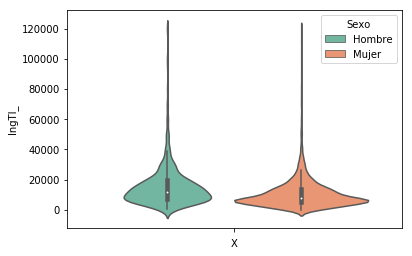

In [21]:
sns.violinplot(x='X', y='IngTI_', hue='Sexo', palette="Set2", data=dg, hue_order=['Hombre','Mujer']);

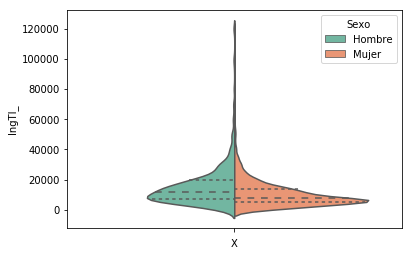

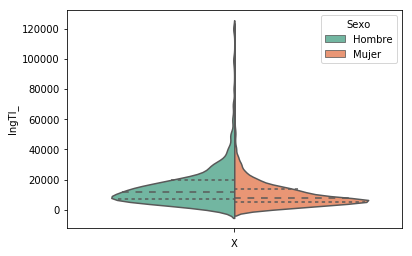

In [22]:
sns.violinplot(x='X',y='IngTI_', hue='Sexo', palette="Set2", split=True, scale="area", inner="quartile", data=dg, hue_order=['Hombre','Mujer'])
plt.show()
sns.violinplot(x='X',y='IngTI_', hue='Sexo', palette="Set2", split=True, scale="count", inner="quartile", data=dg, hue_order=['Hombre','Mujer'])

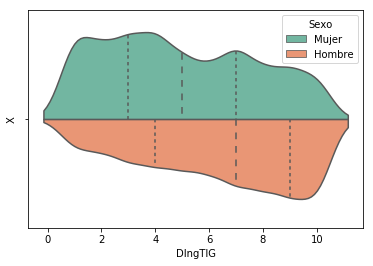

In [23]:
sns.violinplot(y='X',x='DIngTIG', hue='Sexo', palette="Set2", split=True, scale="count", inner="quartile", data=dg)

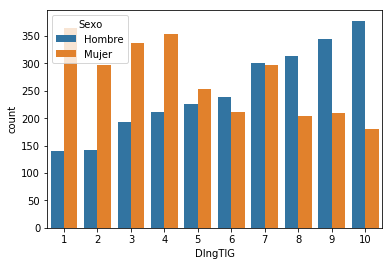

In [24]:
sns.countplot(x='DIngTIG', hue='Sexo', data=dg, hue_order=['Hombre','Mujer'])

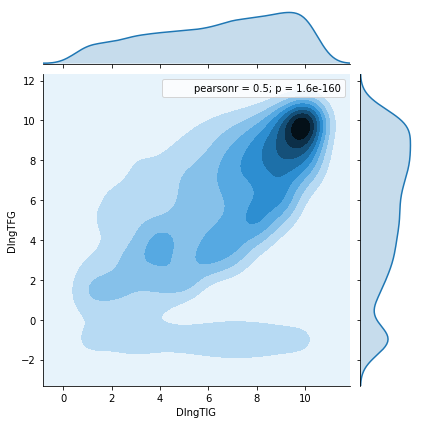

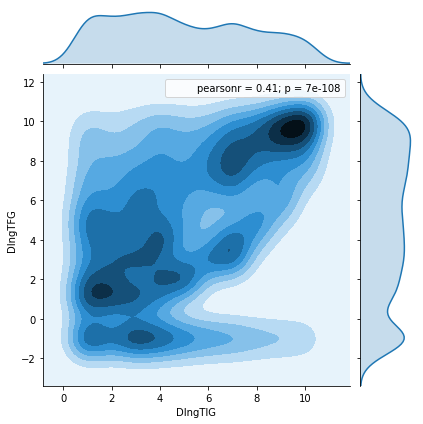

In [25]:
diH=df[(df['IngTI']>0)&(df['Sexo']=='Hombre')]
diM=df[(df['IngTI']>0)&(df['Sexo']=='Mujer')]
sns.jointplot(x="DIngTIG", y="DIngTFG", data=diH, kind="kde");
plt.show()
sns.jointplot(x="DIngTIG", y="DIngTFG", data=diM, kind="kde");

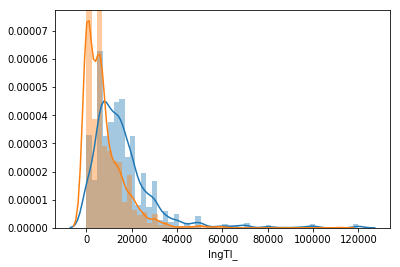

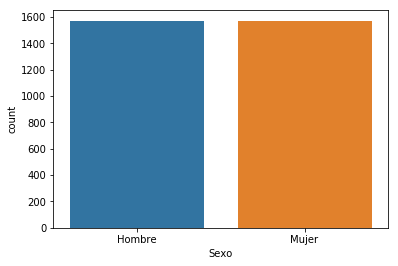

In [26]:
##PAREJAS
U1=(df[(df.RelHogar==1)&(df.Nro_Hogar==1)].Nro_Vivienda).unique()
U2=(df[(df.RelHogar==2)&(df.Nro_Hogar==1)].Nro_Vivienda).unique()
V=[((u in U1)&(u in U2)) for u in df.Nro_Vivienda]
dp=df[V] 
dp=dp[(dp.Nro_Hogar==1)]
dp=dp[(dp.RelHogar==1)|(dp.RelHogar==2)]
sns.distplot(dp['IngTI_'].loc[dp['Sexo']=='Hombre'])
sns.distplot(dp['IngTI_'].loc[dp['Sexo']=='Mujer'])
plt.show()
sns.countplot(dp.Sexo, order=['Hombre','Mujer'])

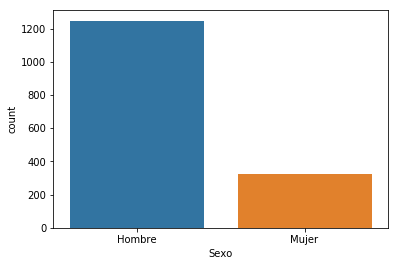

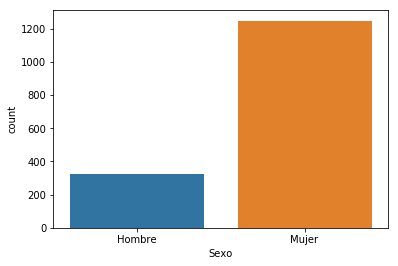

In [27]:
sns.countplot(dp[(dp.RelHogar==1)].Sexo, order=['Hombre','Mujer'])
plt.show()
sns.countplot(dp[(dp.RelHogar==2)].Sexo, order=['Hombre','Mujer'])


In [28]:
Dh={}
Dm={}
for v in dp.Nro_Vivienda:
    a=dp[(dp['RelHogar']==1)&(dp['Nro_Vivienda']==v)].iloc[0]
    b=dp[(dp['RelHogar']==2)&(dp['Nro_Vivienda']==v)].iloc[0]
    if (a.Sexo=='Hombre')&(b.Sexo=='Mujer'):
        Dh[v]=a['IngTI_']
        Dm[v]=b['IngTI_']
    elif (b.Sexo=='Hombre')&(a.Sexo=='Mujer'):
        Dh[v]=b['IngTI_']
        Dm[v]=a['IngTI_']
#Dh=pd.DataFrame(Dh)
#Dm=pd.DataFrame(Dm)
#Çprint(Dh.shape,Dm.shape)

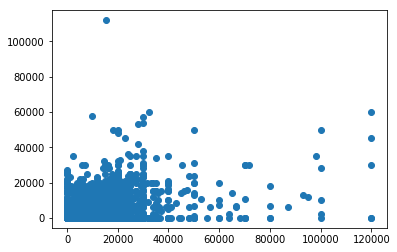

In [29]:
plt.scatter(Dh.values(),Dm.values())

In [30]:
D={}
for k in Dh.keys():
  D[k]={'H':Dh[k],'M':Dm[k] }
dq=pd.DataFrame(D).T

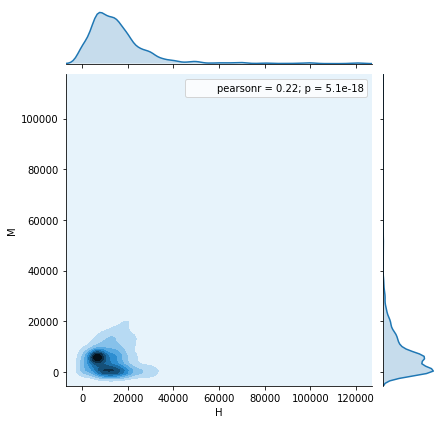

In [31]:
sns.jointplot(x="H", y="M", data=dq, kind="kde");

In [32]:
S=np.array([[D[d]['H'],D[d]['M']] for d in D])
Hd=(S[:,0]==0)
Md=(S[:,1]==0)
Ad=Hd&Md
Hd=Hd&np.invert(Ad)
Ao=np.invert(Ad|Hd|Md)
#sns.jointplot(x=S[:,0],y=S[:,1], kind="kde");
#plt.scatter(S[:,1],S[:,0])

In [33]:
print("Ambos sin ingresos: ", Ad.sum()," \nHombr sin ingresos: ", Hd.sum()," \nMujer sin ingresos: ", Md.sum()," \nAmbos con ingresos: ", Ao.sum())


Ambos sin ingresos:  16  
Hombr sin ingresos:  68  
Mujer sin ingresos:  406  
Ambos con ingresos:  1073


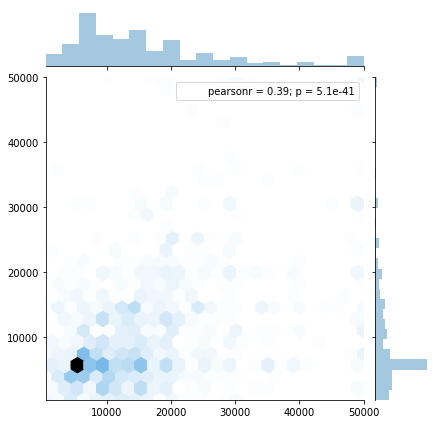

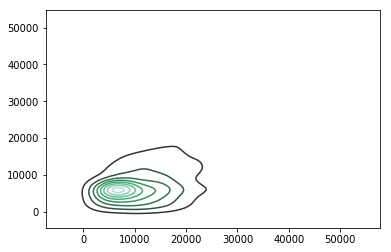

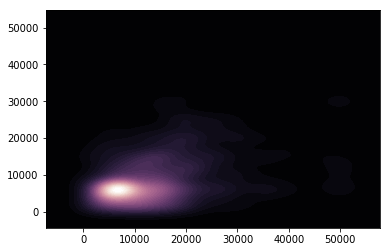

In [34]:
cota=50000
S_=S.copy()
S_[S_>cota]=cota
sns.jointplot(x=S_[Ao,0],y=S_[Ao,1], kind="hex");
plt.show()
sns.kdeplot(S_[Ao,0],S_[Ao,1])
plt.show()
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(S_[Ao,0],S_[Ao,1], cmap=cmap, n_levels=60, shade=True);
plt.show()


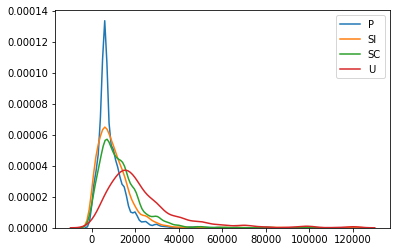

In [35]:
NE={'P':[1,2,7,9],'SI':[3],'SC':[4,5],'U':[6]}

for ne in NE:
    G=[n in NE[ne] for n in dg.NivelEd]
    sns.kdeplot(dg[G].IngTI_,label=ne)
    #print (ne)
    
    
#    sns.kdeplot(dg[dg.NivelEd==ne].IngTI_,label=ne)
#plt.legend();


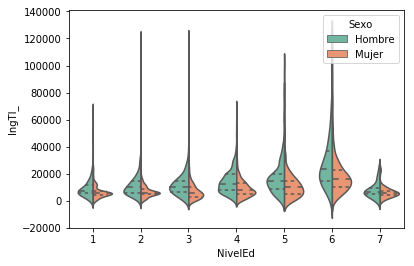

In [36]:
sns.violinplot(x='NivelEd',y='IngTI_', hue='Sexo', palette="Set2", split=True, scale="count", inner="quartile", data=dg, hue_order=['Hombre','Mujer'])

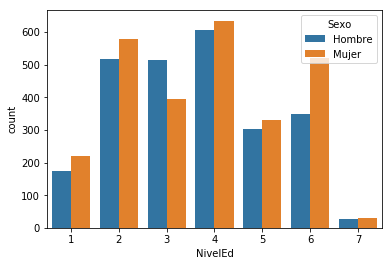

In [37]:
sns.countplot(x='NivelEd', hue='Sexo', data=dg, hue_order=['Hombre','Mujer'])

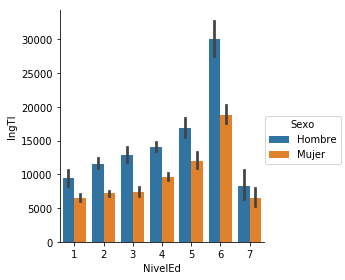

In [38]:
sns.factorplot(x="NivelEd", y="IngTI", hue="Sexo", data=dg, kind="bar", hue_order=['Hombre','Mujer']);

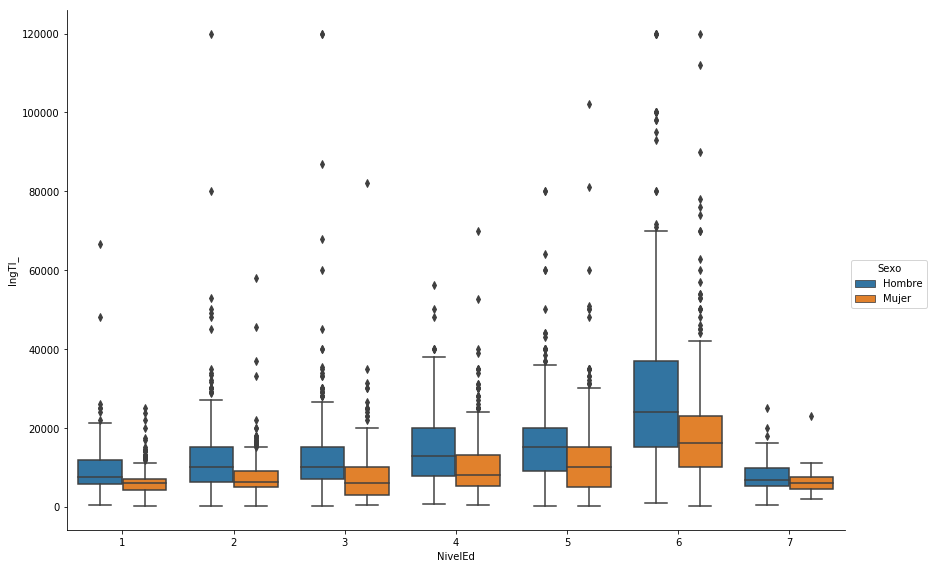

In [39]:
sns.factorplot(x="NivelEd", y="IngTI_", hue="Sexo", data=dg, kind="box", size=8, aspect=1.5, hue_order=['Hombre','Mujer']);#col="day", size=4, aspect=.5);

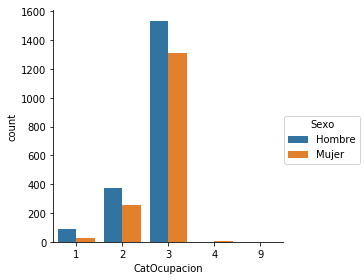

In [40]:
dO=dg[(dg.CatOcupacion!=0)]
sns.factorplot(x="CatOcupacion", hue="Sexo", data=dO, kind="count", hue_order=['Hombre','Mujer']);
#1=Patron, 2=Cuentapropista, 3=Empleado

In [41]:
dP=dO[dO.CatOcupacion==1]
print("Trabajadores H/M:", (dO.Sexo=='Hombre').sum()/(dO.Sexo=='Mujer').sum())
print("Patrones     H/M:", (dP.Sexo=='Hombre').sum()/(dP.Sexo=='Mujer').sum())

Trabajadores H/M: 1.2476606363069245
Patrones     H/M: 3.4074074074074074


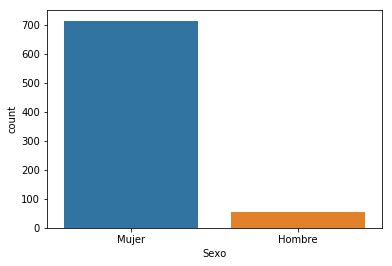

In [42]:
#Amas de CASA
dA=df[df.CatInactividad==4]
sns.countplot(dA.Sexo)

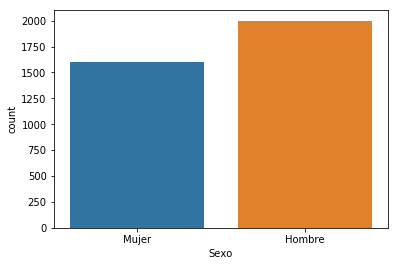

In [43]:
##Trabajadores
sns.countplot(dO.Sexo)

In [44]:
(dO.Sexo=='Hombre').sum()-(dO.Sexo=='Mujer').sum()+(dA.Sexo=='Hombre').sum()-(dA.Sexo=='Mujer').sum()


-263